# Import Tensorflow and other libraries

In [1]:
!pip install opencv-python


In [2]:
#!pip install tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np



## Test preprocessing on one image from dataset 1


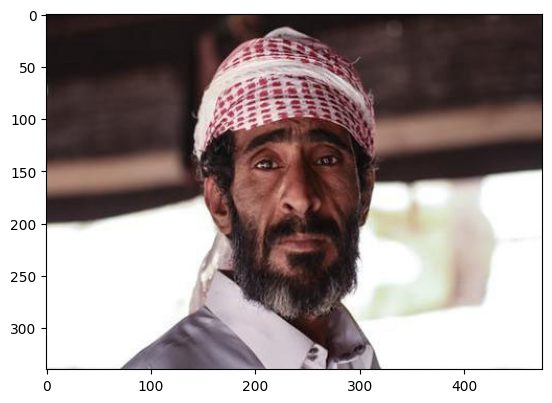

In [4]:
# create the path

path_img = "../raw_data/photo/photo3/image0001.jpg"
raw_img= plt.imread(path_img)
plt.imshow(raw_img)


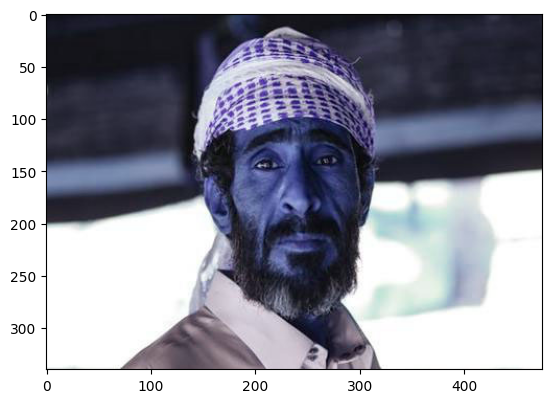

In [5]:
# Read the input image
img=cv2.imread(path_img)
  
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_alt2.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 8)


  
# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    face = img[y:y + h, x:x + w]
    cv2.imshow("face",face)
    cv2.imwrite('face.jpg', face)
      
# Display the output

plt.imshow(img)


In [5]:
#new x and y coordinates

y_min_2= y -int(np.ceil((220-h)/2))
y_max_2 = y_min_2 + 220

x_min_2= x -int(np.ceil((220-w)/2))
x_max_2 = x_min_2 +220

(y_min_2,y_max_2),(x_min_2,x_max_2)


((13, 233), (14, 234))

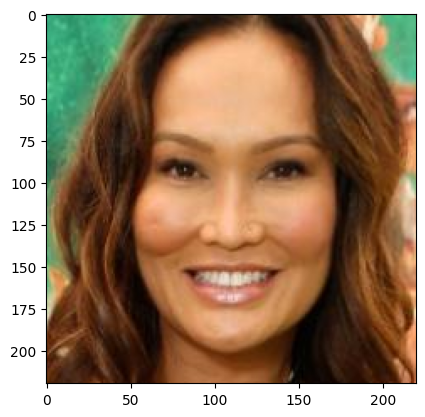

In [6]:
#new image

trunc_img=raw_img[y_min_2:y_max_2,x_min_2:x_max_2]
plt.imshow(trunc_img)


## Test preprocessing on one image from dataset 2



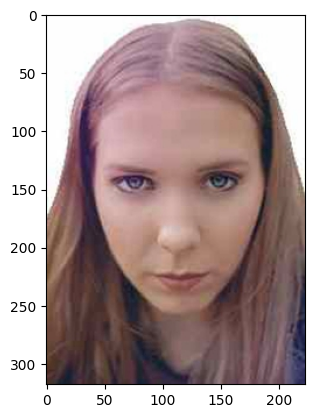

In [7]:
# create the path

path_img_2 = "../raw_data/photo/photo2/image0001.jpg"
raw_img_2= plt.imread(path_img_2)
plt.imshow(raw_img_2)

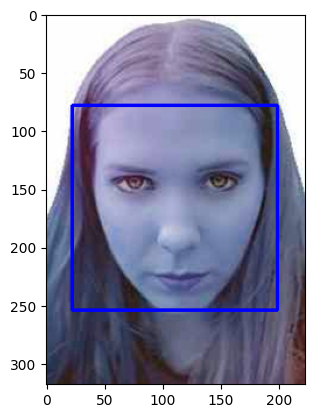

In [8]:
# Read the input image
img_2=cv2.imread(path_img_2)
  
# Convert into grayscale
gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
  
# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_alt2.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 8)


  
# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img_2, (x, y), (x+w, y+h), (0, 0, 255), 2)
    face_2 = img[y:y + h, x:x + w]
    cv2.imshow("face",face_2)
    cv2.imwrite('face.jpg', face_2)
      
# Display the output

plt.imshow(img_2)



In [9]:
#new x and y coordinates

y_min_2= y -int(np.ceil((220-h)/2))
y_max_2 = y_min_2 + 220

x_min_2= x -int(np.ceil((220-w)/2))
x_max_2 = x_min_2 +220

(y_min_2,y_max_2),(x_min_2,x_max_2)


((56, 276), (0, 220))

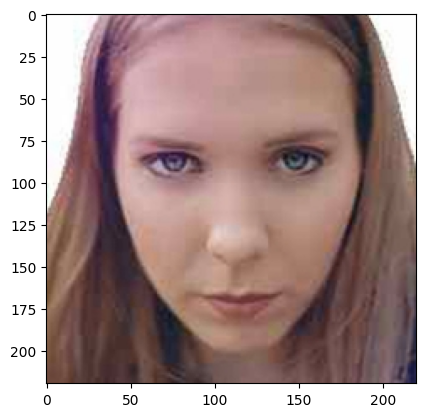

In [10]:
#new image

trunc_img_2=raw_img_2[y_min_2:y_max_2,x_min_2:x_max_2]
plt.imshow(trunc_img_2)



## Test preprocessing on one image from dataset 2


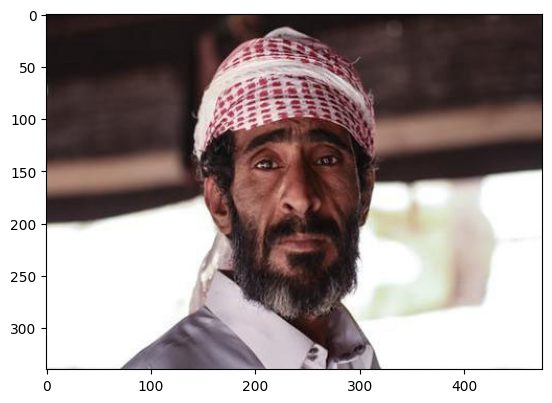

In [11]:
# create the path

path_img_3 = "../raw_data/photo/photo3/image0001.jpg"


raw_img_3= plt.imread(path_img_3)
plt.imshow(raw_img_3)


In [15]:
raw_img_3.shape


(340, 475, 3)

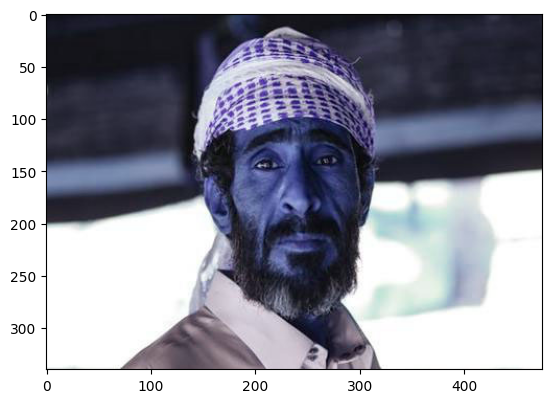

In [12]:
# Read the input image
img_3=cv2.imread(path_img_3)
  
# Convert into grayscale
gray = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)
  
# Load the cascade
face_cascade = cv2.CascadeClassifier('../haarcascade_frontalface_alt2.xml')
  
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 8)


  
# Draw rectangle around the faces and crop the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img_3, (x, y), (x+w, y+h), (0, 0, 255), 2)
    face_3 = img[y:y + h, x:x + w]
    cv2.imshow("face",face_3)
    cv2.imwrite('face.jpg', face_3)
      
# Display the output

plt.imshow(img_3)




In [13]:
#new x and y coordinates

y_min_3= y -int(np.ceil((220-h)/2))
y_max_3 = y_min_3 + 220

x_min_3= x -int(np.ceil((220-w)/2))
x_max_3 = x_min_3 +220

(y_min_3,y_max_3),(x_min_2,x_max_2)


((56, 276), (0, 220))

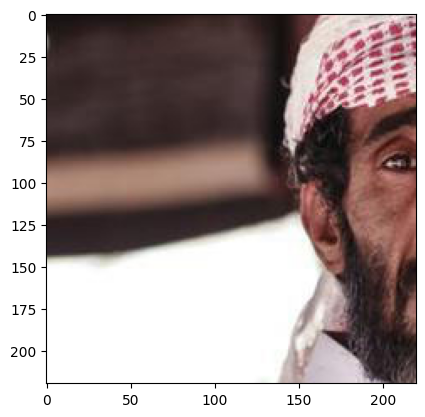

In [14]:
#new image

trunc_img_3=raw_img_3[y_min_3:y_max_3,x_min_3:x_max_3]
plt.imshow(trunc_img_3)

